In [1]:
# Data handling
import pandas as pd
import numpy as np
# Preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2
# Machine Learning Models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# Evaluation
from sklearn.metrics import classification_report, confusion_matrix
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Ignore warnings (optional)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
file_path = r"C:\Uni\dataproject\PROJET-DATA-MINING\data2.csv"  
data = pd.read_csv(file_path)

# Display the first few rows
data.head()

,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud
0,DOCTOR,42509,3515418493460774,07/25,251,1
1,DOCTOR,80334,213134223583196,05/32,858,1
2,LAWYER,91552,4869615013764888,03/30,755,1
3,LAWYER,43623,341063356109385,01/29,160,1
4,DOCTOR,22962,4707418777543978402,11/30,102,0


In [3]:
# Check dataset structure
print(data.info())

# Check for missing values
print(data.isnull().sum())

# View descriptive statistics
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Profession          10000 non-null  object
 1   Income              10000 non-null  int64 
 2   Credit_card_number  10000 non-null  int64 
 3   Expiry              10000 non-null  object
 4   Security_code       10000 non-null  int64 
 5   Fraud               10000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 468.9+ KB
None
Profession            0
Income                0
Credit_card_number    0
Expiry                0
Security_code         0
Fraud                 0
dtype: int64
            Income  Credit_card_number  Security_code         Fraud
count  10000.00000        1.000000e+04   10000.000000  10000.000000
mean   49761.20600        3.851363e+17     863.587800      0.501600
std    28837.72928        1.257950e+18    1484.424959      0.500022
min        1.00000     

In [4]:
# Drop rows with missing values
data = data.dropna()

# Alternatively, fill missing values
# data['Income'] = data['Income'].fillna(data['Income'].mean())

data = data.drop(['Credit_card_number', 'Expiry'], axis=1)

In [5]:
le = LabelEncoder()
data['Profession'] = le.fit_transform(data['Profession'])

In [6]:
scaler = MinMaxScaler()
data[['Income', 'Security_code']] = scaler.fit_transform(data[['Income', 'Security_code']])

In [7]:
X = data.drop('Fraud', axis=1)  # Features
y = data['Fraud']              # Target

In [8]:
selector = SelectKBest(score_func=chi2, k=5)  # Select top 5 features
X_new = selector.fit_transform(X, y)

# Print the selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Profession', 'Income', 'Security_code'], dtype='object')


In [9]:
# Check if 'Description' column exists and contains text data
if 'Description' in data.columns:
    print(data['Description'].head())
else:
    print("No text column found for TF-IDF.")

No text column found for TF-IDF.


In [10]:
# Generate a description column programmatically
descriptions = [
    "Doctor with high income",
    "Engineer specialized in software",
    "Lawyer focused on corporate law",
    "Engineer in mechanical systems",
    "Doctor working in cardiology",
    "Engineer in AI research",
    "Lawyer specializing in criminal law",
    "Doctor with expertise in pediatrics",
    "Engineer handling robotics projects",
    "Lawyer working in public defense"
]

# Repeat descriptions to match the dataset length
data['Description'] = descriptions * (len(data) // len(descriptions)) + descriptions[:len(data) % len(descriptions)]

# Check the updated dataset
print(data.head())

   Profession    Income  Security_code  Fraud  \
0           0  0.425144       0.025125      1   
1           0  0.803451       0.085886      1   
2           2  0.915647       0.075576      1   
3           2  0.436285       0.016016      1   
4           0  0.229644       0.010210      0   

                        Description  
0           Doctor with high income  
1  Engineer specialized in software  
2   Lawyer focused on corporate law  
3    Engineer in mechanical systems  
4      Doctor working in cardiology  


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF to the new Description column
vectorizer = TfidfVectorizer(max_features=100)  # Extract top 100 features
tfidf_matrix = vectorizer.fit_transform(data['Description'])

# Convert TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate the TF-IDF DataFrame with the original dataset
data = pd.concat([data, tfidf_df], axis=1)

# Drop the original Description column if no longer needed
data = data.drop('Description', axis=1)

# Check the updated dataset
print(data.head())

   Profession    Income  Security_code  Fraud   ai  cardiology  corporate  \
0           0  0.425144       0.025125      1  0.0    0.000000   0.000000   
1           0  0.803451       0.085886      1  0.0    0.000000   0.000000   
2           2  0.915647       0.075576      1  0.0    0.000000   0.495685   
3           2  0.436285       0.016016      1  0.0    0.000000   0.000000   
4           0  0.229644       0.010210      0  0.0    0.668337   0.000000   

   criminal  defense    doctor  ...  projects  public  research  robotics  \
0       0.0      0.0  0.380943  ...       0.0     0.0       0.0       0.0   
1       0.0      0.0  0.000000  ...       0.0     0.0       0.0       0.0   
2       0.0      0.0  0.000000  ...       0.0     0.0       0.0       0.0   
3       0.0      0.0  0.000000  ...       0.0     0.0       0.0       0.0   
4       0.0      0.0  0.446087  ...       0.0     0.0       0.0       0.0   

   software  specialized  specializing   systems      with   working  
0  

In [12]:
#partie feature selection avec Lasso et Random Forest <LATIFA DIDI ALAOUI >

In [13]:
#les bibliothèques nécessaires pour Lasso et Random Forest
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier

In [14]:
# Séparer le jeu de données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

In [15]:
#la variable cible est 'Fraud' 
X = data.drop('Fraud', axis=1) # Features
y = data['Fraud']                # target

In [16]:
# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# 1. Sélection de caractéristiques avec Lasso
for alpha in [0.1, 0.01, 0.001]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    print(f"Alpha: {alpha}, Coefficients: {lasso.coef_}")
lasso.fit(X_train, y_train)

Alpha: 0.1, Coefficients: [-0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0. -0.  0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0. -0. -0.  0.  0.  0. -0.]
Alpha: 0.01, Coefficients: [-0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0. -0.  0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0. -0. -0.  0.  0.  0. -0.]
Alpha: 0.001, Coefficients: [-7.06673753e-03 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -2.90975924e-02  0.00000000e+00  0.00000000e+00  4.26375451e-03
 -0.00000000e+00 -0.00000000e+00  2.43425569e-02  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.32084474e-05 -0.00000000e+00  2.72839631e-03 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]


Lasso(alpha=0.001)

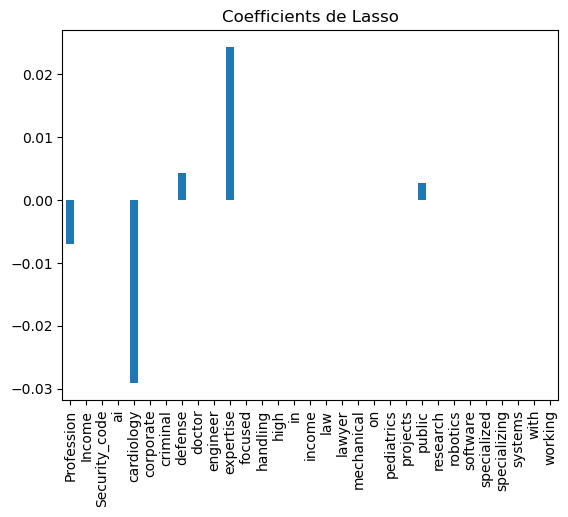

In [18]:
# Afficher les coefficients de Lasso
lasso_coef = pd.Series(lasso.coef_, index=X.columns)
lasso_coef.plot(kind='bar', title='Coefficients de Lasso')
plt.show()

In [19]:
selected_features = X.columns[lasso.coef_ != 0]
print("Caractéristiques sélectionnées :", selected_features)

Caractéristiques sélectionnées : Index(['Profession', 'cardiology', 'defense', 'expertise', 'pediatrics',
       'public'],
      dtype='object')


In [20]:
# Display the first few rows
data.head()

,Profession,Income,Security_code,Fraud,ai,cardiology,corporate,criminal,defense,doctor,...,projects,public,research,robotics,software,specialized,specializing,systems,with,working
0,0,0.425144,0.025125,1,0.0,0.000000,0.000000,0.0,0.0,0.380943,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.451003,0.000000
1,0,0.803451,0.085886,1,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.631743,0.631743,0.0,0.000000,0.000000,0.000000
2,2,0.915647,0.075576,1,0.0,0.000000,0.495685,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,2,0.436285,0.016016,1,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.631743,0.000000,0.000000
4,0,0.229644,0.010210,0,0.0,0.668337,0.000000,0.0,0.0,0.446087,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.528129


In [21]:
# 2. Sélection de caractéristiques avec Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# Importance des caractéristiques
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

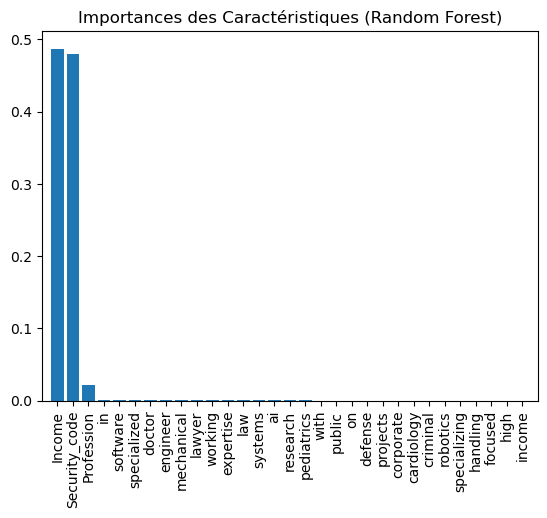

In [23]:
# Tracer l'importance des caractéristiques
plt.figure()
plt.title('Importances des Caractéristiques (Random Forest)')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [24]:
#imprimer l'importance de chaque caractéristique
for i in range(X.shape[1]):
    print(f"Caractéristique : {X.columns[indices[i]]}, Importance : {importances[indices[i]]}")

Caractéristique : Income, Importance : 0.48700293154946833
Caractéristique : Security_code, Importance : 0.4792432944093339
Caractéristique : Profession, Importance : 0.02160745158733809
Caractéristique : in, Importance : 0.0009958226890070196
Caractéristique : software, Importance : 0.000818089317556792
Caractéristique : specialized, Importance : 0.0007269721741546642
Caractéristique : doctor, Importance : 0.0006831708532976759
Caractéristique : engineer, Importance : 0.0006585838011644094
Caractéristique : mechanical, Importance : 0.0006022373878096835
Caractéristique : lawyer, Importance : 0.0005707227974022451
Caractéristique : working, Importance : 0.0005671728833324043
Caractéristique : expertise, Importance : 0.0004665895931827831
Caractéristique : law, Importance : 0.00046524100112338705
Caractéristique : systems, Importance : 0.0004645144409247893
Caractéristique : ai, Importance : 0.00044278365449605683
Caractéristique : research, Importance : 0.00043030087350939855
Caractéri

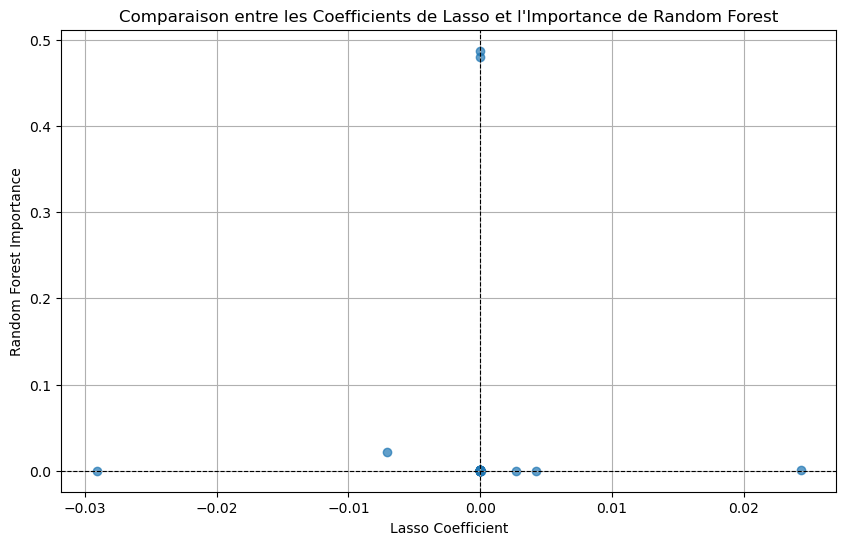

In [25]:
# 3. Nuage de Points pour comparer Lasso et Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(lasso_coef, importances, alpha=0.7)
plt.title('Comparaison entre les Coefficients de Lasso et l\'Importance de Random Forest')
plt.xlabel('Lasso Coefficient')
plt.ylabel('Random Forest Importance')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.grid()
plt.show()

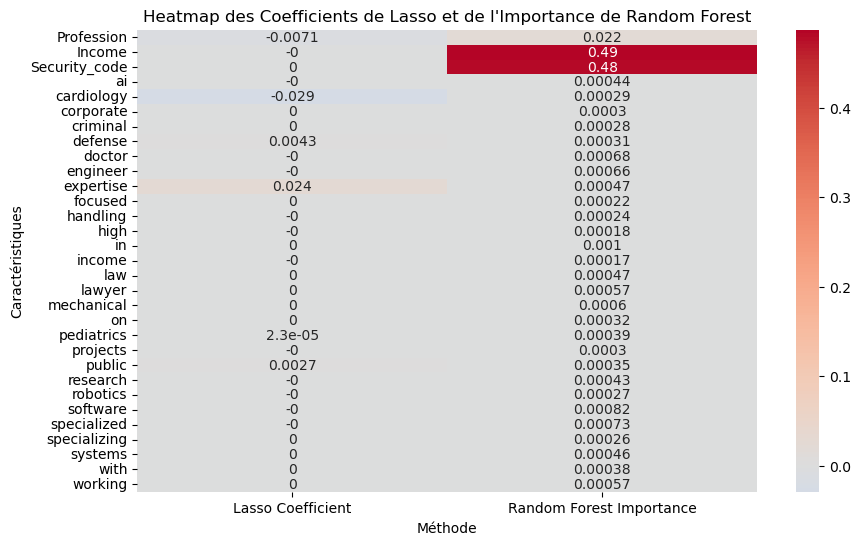

In [26]:
# 4. Heatmap des Coefficients et Importances
comparison_df = pd.DataFrame({
    'Lasso Coefficient': lasso_coef,
    'Random Forest Importance': importances
})

plt.figure(figsize=(10, 6))
sns.heatmap(comparison_df, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap des Coefficients de Lasso et de l\'Importance de Random Forest')
plt.xlabel('Méthode')
plt.ylabel('Caractéristiques')
plt.show()

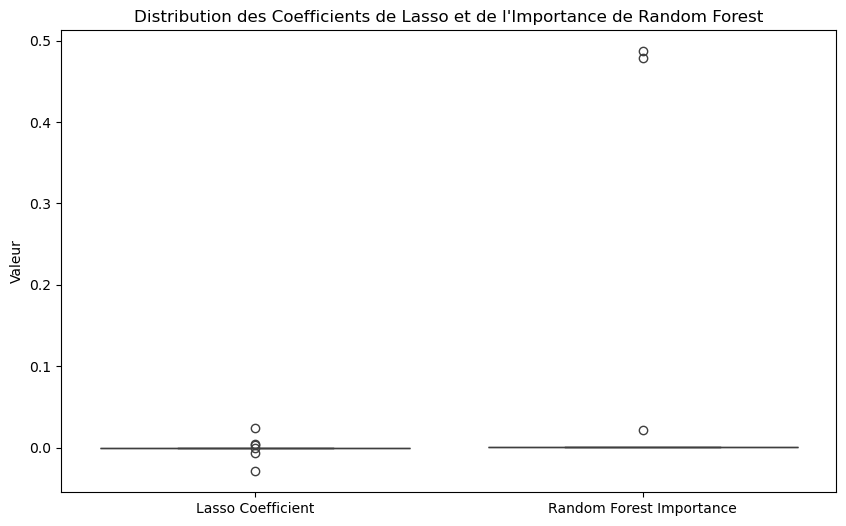

In [27]:
# 5. Boxplot des Coefficients de Lasso et des Importances
boxplot_df = pd.DataFrame({
    'Lasso Coefficient': lasso_coef,
    'Random Forest Importance': importances
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=boxplot_df)
plt.title('Distribution des Coefficients de Lasso et de l\'Importance de Random Forest')
plt.ylabel('Valeur')
plt.xticks([0, 1], ['Lasso Coefficient', 'Random Forest Importance'])
plt.show()

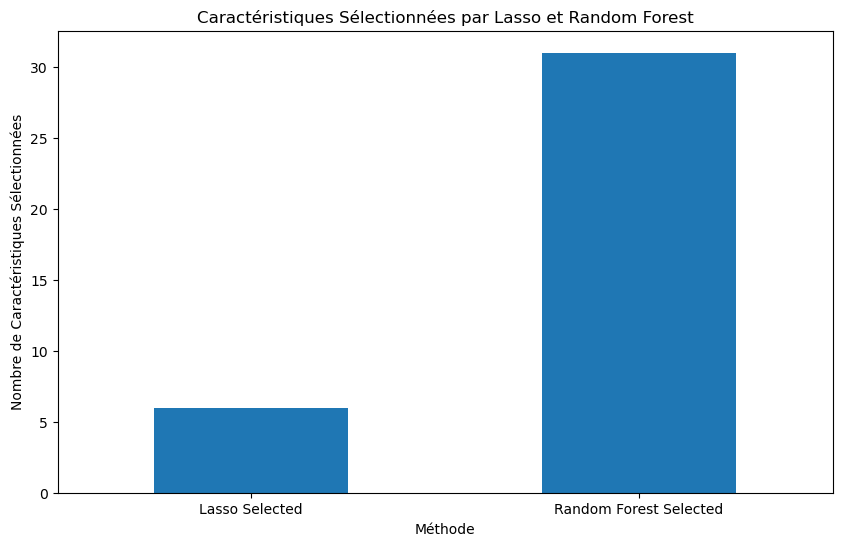

In [28]:
# 6. Graphique de Barres Empilées pour les Caractéristiques Sélectionnées
lasso_selected = lasso_coef != 0
rf_selected = importances > 0

selection_df = pd.DataFrame({
    'Lasso Selected': lasso_selected,
    'Random Forest Selected': rf_selected
})

plt.figure(figsize=(10, 6))
selection_df.sum().plot(kind='bar', stacked=True)
plt.title('Caractéristiques Sélectionnées par Lasso et Random Forest')
plt.ylabel('Nombre de Caractéristiques Sélectionnées')
plt.xlabel('Méthode')
plt.xticks(rotation=0)
plt.show()

In [29]:
from sklearn.metrics import accuracy_score

# 1. Précision du modèle Lasso
# Prédictions avec Lasso (doit être binaire, donc seuil de 0.5)
lasso_predictions = (lasso.predict(X_test) > 0.5).astype(int)
lasso_accuracy = accuracy_score(y_test, lasso_predictions)
print(f'Accuracy du modèle Lasso : {lasso_accuracy:.2f}')

# 2. Précision du modèle Random Forest
# Prédictions avec Random Forest
rf_predictions = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Accuracy du modèle Random Forest : {rf_accuracy:.2f}')

Accuracy du modèle Lasso : 0.50
Accuracy du modèle Random Forest : 0.51


In [ ]:
#partie knn


Accuracy pour k=3: 0.50
Accuracy pour k=5: 0.50
Accuracy pour k=7: 0.49
Le meilleur k est 3 avec une précision de 0.50
Rapport de classification (KNN) :
              precision    recall  f1-score   support

           0       0.50      0.49      0.49       995
           1       0.50      0.51      0.51      1005

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



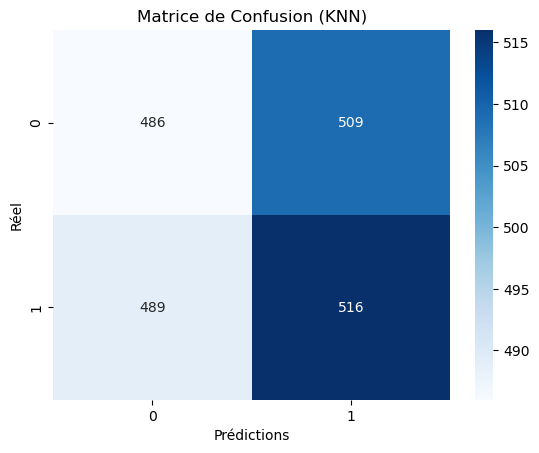

Accuracy du modèle KNN : 0.50


In [44]:
# Importer la bibliothèque nécessaire pour KNN
from sklearn.neighbors import KNeighborsClassifier

# 1. Initialisation du modèle KNN
k_values = [3, 5, 7]  # Différents nombres de voisins à tester
best_k = None
best_accuracy = 0

# Tester plusieurs valeurs de k pour trouver la meilleure
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Entraînement du modèle
    knn_predictions = knn.predict(X_test)  # Prédictions
    knn_accuracy = accuracy_score(y_test, knn_predictions)  # Précision du modèle

    print(f'Accuracy pour k={k}: {knn_accuracy:.2f}')
    if knn_accuracy > best_accuracy:
        best_k = k
        best_accuracy = knn_accuracy

# Afficher le meilleur k
print(f'Le meilleur k est {best_k} avec une précision de {best_accuracy:.2f}')

# 2. Entraîner le modèle avec le meilleur k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# 3. Prédictions finales
knn_predictions = knn.predict(X_test)

# 4. Évaluation du modèle
print("Rapport de classification (KNN) :")
print(classification_report(y_test, knn_predictions))

# 5. Matrice de confusion
conf_matrix = confusion_matrix(y_test, knn_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion (KNN)')
plt.xlabel('Prédictions')
plt.ylabel('Réel')
plt.show()

# Comparer avec d'autres modèles
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f'Accuracy du modèle KNN : {knn_accuracy:.2f}')


In [ ]:
#partie svm

Accuracy du modèle SVM : 0.52

Rapport de classification (SVM) :
              precision    recall  f1-score   support

           0       0.52      0.50      0.51       995
           1       0.52      0.55      0.54      1005

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.52      2000
weighted avg       0.52      0.52      0.52      2000



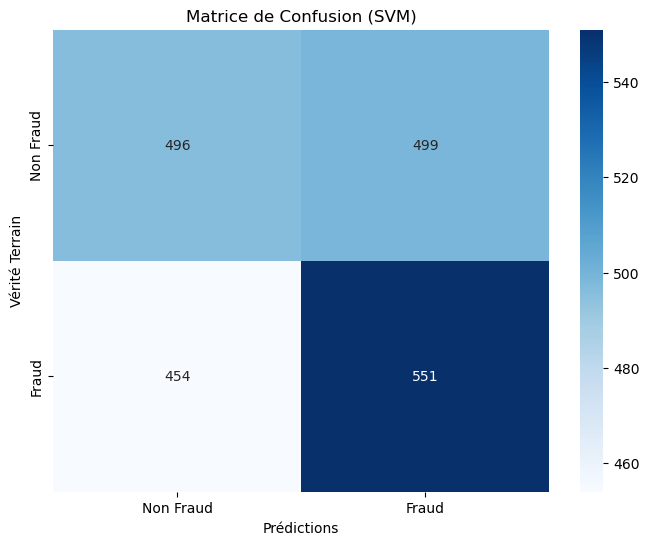

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialiser et entraîner le modèle SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)  # Vous pouvez changer le kernel ('linear', 'rbf', 'poly', etc.)
svm_model.fit(X_train, y_train)

# Prédire les résultats sur le jeu de test
svm_predictions = svm_model.predict(X_test)

# Évaluer les performances
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'Accuracy du modèle SVM : {svm_accuracy:.2f}')

# Rapport de classification
print("\nRapport de classification (SVM) :")
print(classification_report(y_test, svm_predictions))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, svm_predictions)

# Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Fraud', 'Fraud'], yticklabels=['Non Fraud', 'Fraud'])
plt.title('Matrice de Confusion (SVM)')
plt.xlabel('Prédictions')
plt.ylabel('Vérité Terrain')
plt.show()
